In [1]:
import keras_tuner as kt
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел
import math # Для округления
import os #Для работы с файлами
# подключем диск
from google.colab import drive
from sklearn.model_selection import train_test_split


%matplotlib inline

<ipython-input-1-788fd5b3caed>:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

In [3]:
model = keras.Sequential()

model.add(layers.Conv2D(32, (3,3),activation='silu', padding='same'))
model.add(layers.Conv2D(32, (3,3),activation='silu', padding='same'))
model.add(keras.layers.BatchNormalization(input_shape=()))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3),padding='same', activation='silu'))
model.add(layers.Conv2D(64, (3,3),padding='same', activation='silu'))
model.add(keras.layers.BatchNormalization(input_shape=()))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3,3),padding='same', activation='silu'))
model.add(keras.layers.BatchNormalization(input_shape=()))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [4]:
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history = model.fit(x_train,
                    y_train,
                    batch_size=100,
                    epochs=30,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/30
400/400 [==============================] - 27s 21ms/step - loss: 1.7475 - accuracy: 0.3733 - val_loss: 3.8533 - val_accuracy: 0.1565
Epoch 2/30
400/400 [==============================] - 9s 22ms/step - loss: 1.2770 - accuracy: 0.5504 - val_loss: 1.1513 - val_accuracy: 0.5947
Epoch 3/30
400/400 [==============================] - 7s 18ms/step - loss: 1.0492 - accuracy: 0.6390 - val_loss: 1.1344 - val_accuracy: 0.6276
Epoch 4/30
400/400 [==============================] - 8s 19ms/step - loss: 0.9020 - accuracy: 0.6914 - val_loss: 0.8195 - val_accuracy: 0.7131
Epoch 5/30
400/400 [==============================] - 7s 18ms/step - loss: 0.8028 - accuracy: 0.7234 - val_loss: 0.7899 - val_accuracy: 0.7296
Epoch 6/30
400/400 [==============================] - 8s 20ms/step - loss: 0.7134 - accuracy: 0.7570 - val_loss: 0.8217 - val_accuracy: 0.7206
Epoch 7/30
400/400 [==============================] - 10s 25ms/step - loss: 0.6595 - accuracy: 0.7763 - val_loss: 0.7112 - val_accuracy: 0.75

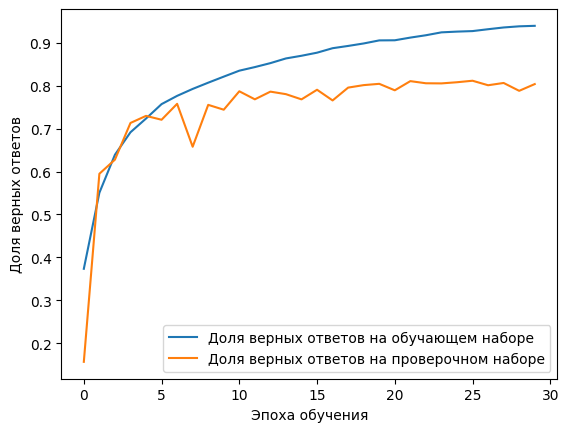

In [5]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

на обучающем наборе максимальная точность около 94 процентов, на проверочном 81 процент

In [19]:
!unzip "Автомобили.zip"

Archive:  Автомобили.zip
   creating: Автомобили/
   creating: Автомобили/train/
   creating: Автомобили/train/Ferrari/
  inflating: Автомобили/train/Ferrari/car_Ferrari__0.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__10.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__100.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1000.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1002.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1003.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1004.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1005.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1006.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1007.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1009.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__101.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1010.png  
  inflating: Автомобил

In [23]:
batch_size = 32
img_width = 192
img_height = 108

In [29]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=10, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.1, #Зумируем изображения при генерации выборки
    horizontal_flip=True, #Отключаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    validation_split=0.1 #Указываем разделение изображений на обучающую и тестовую выборку
)

train_dir = 'Автомобили/train'
val_dir = 'Автомобили/val'
image_size = (img_width, img_height)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.


In [30]:
from keras.layers import Dense, Activation, Dropout, BatchNormalization

model = Sequential([
     Conv2D(256, (3, 3), padding='same', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((3,3)),
    Dropout(0.2),

    Conv2D(512, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((3,3)),
    Dropout(0.2),

    Conv2D(1024, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((3,3)),
    Dropout(0.3),

    Flatten(),
    Dense(2048),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(1024),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

In [31]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

In [32]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch_size,
    epochs=15,
    verbose=1
)

<ipython-input-32-88327e6a57c4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
85/85 [==============================] - 61s 679ms/step - loss: 1.2863 - accuracy: 0.5094 - val_loss: 1.4480 - val_accuracy: 0.3378
Epoch 2/15
85/85 [==============================] - 58s 676ms/step - loss: 1.0374 - accuracy: 0.5581 - val_loss: 1.4249 - val_accuracy: 0.3393
Epoch 3/15
85/85 [==============================] - 58s 681ms/step - loss: 0.9226 - accuracy: 0.5972 - val_loss: 1.8657 - val_accuracy: 0.3363
Epoch 4/15
85/85 [==============================] - 63s 744ms/step - loss: 0.8639 - accuracy: 0.6208 - val_loss: 1.1703 - val_accuracy: 0.4583
Epoch 5/15
85/85 [==============================] - 63s 742ms/step - loss: 0.8147 - accuracy: 0.6448 - val_loss: 1.4426 - val_accuracy: 0.4152
Epoch 6/15
85/85 [==============================] - 59s 686ms/step - loss: 0.7665 - accuracy: 0.6669 - val_loss: 1.0610 - val_accuracy: 0.4688
Epoch 7/15
85/85 [==============================] - 63s 744ms/step - loss: 0.7562 - accuracy: 0.6846 - val_loss: 1.0288 - val_accuracy: 0.5893

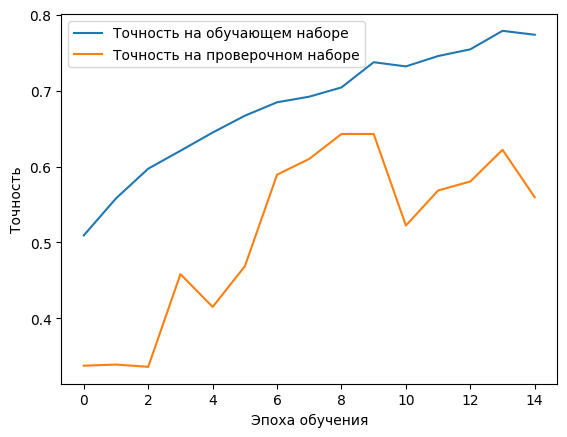

In [33]:
plt.plot(history.history['accuracy'],
         label='Точность на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Точность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()